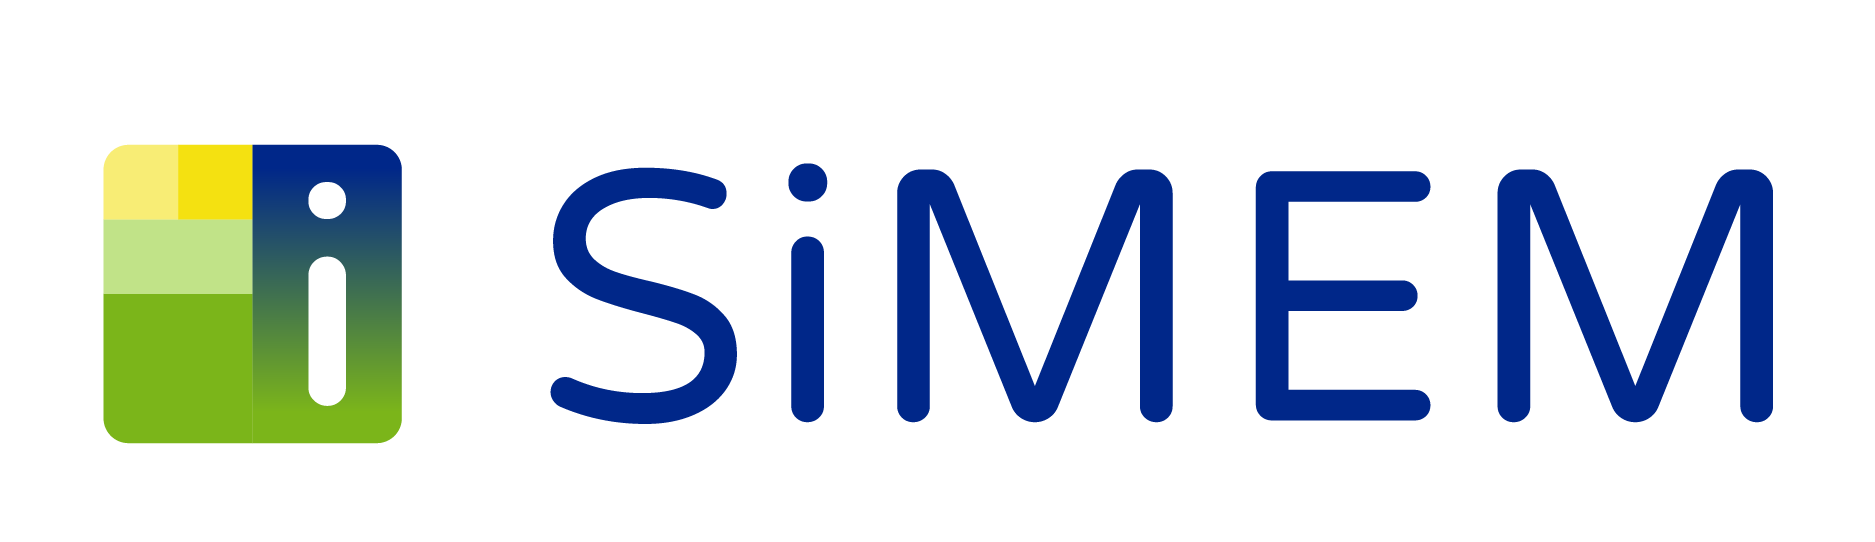

[SiMEM](https://www.simem.co/)

## Caso de uso - Comportamiento aportes hídricos y reservas en energía

* Presentar el paso a paso de cómo consultar la información de variables hidrologicas y su evolución en los ultimos meses.
* Demostrar cómo hacer filtros especializados en un conjunto de datos determinado para obtener las variables de interés.

### Importación de librerías


In [2]:
import sys
# !{sys.executable} -m pip install pydataxm
from pydataxm.pydatasimem import ReadSIMEM
import matplotlib.pyplot as plt

### Consultar información de un conjunto de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Los conjuntos a presentar serán [Aportes Hídricos en Energía](https://www.simem.co/datadetail/BA1C5513-7DC3-4155-9DE9-D262863B31F3) y [Reservas hidrícas en energía](https://www.simem.co/datadetail/9605B04C-8D3A-40A9-94D3-5535670D2F9A) desde marzo 2024 hasta junio 2024.

Se definen los parámetros de entrada y se crea un objeto ReadSIMEM para cada dataset.

In [2]:
id_aportes = 'BA1C55'
id_reservas = 'c51127'
fecha_inicial = '2024-03-15'
fecha_final = '2024-06-05'
dataset_aportes = ReadSIMEM(id_aportes, fecha_inicial, fecha_final)
dataset_reservas = ReadSIMEM(id_reservas, fecha_inicial, fecha_final)

La función main contiene todo el proceso para transportar los datos del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [3]:
df_aportes = dataset_aportes.main()
df_reservas = dataset_reservas.main()
display(df_aportes.head())
display (df_reservas.head())

,FechaPublicacion,Fecha,CodigoSerieHidrologica,RegionHidrologica,AportesHidricosEnergia,PromedioAcumuladoEnergia,MediaHistoricaEnergia
0,2024-09-26,2024-04-14,BAJOANCH,Valle,183600.0,310000.0,430000.0
1,2024-09-26,2024-04-14,CAMECHIN,Caldas,1149100.0,1410000.0,2700000.0
2,2024-09-26,2024-04-14,ALTOANCH,Valle,1873900.0,3570000.0,5110000.0
3,2024-09-26,2024-04-14,EMBAPRAD,Centro,1100.0,470000.0,940000.0
4,2024-09-26,2024-04-14,ESMECAMP,Caldas,702500.0,840000.0,1290000.0


,FechaPublicacion,Fecha,CodigoEmbalse,RegionHidrologica,VolumenUtilDiarioEnergia,CapacidadUtilEnergia,VolumenTotalEnergia,VolumenMaximoTecnicoEnergia,VertimientosEnergia,MinimoOperativoSuperior,MinimoOperativoInferior,CodigoDuracion
0,2024-05-11,2024-04-14,MIRAFLOR,Antioquia,3.828530e+07,4.559788e+08,5.597650e+07,4.736700e+08,0.0,25000000.0,25000000.0,P1D
1,2024-05-11,2024-04-14,PENOL,Antioquia,1.437897e+09,4.120467e+09,1.745653e+09,4.428223e+09,0.0,384985000.0,384985000.0,P1D
2,2024-05-11,2024-04-14,SISGA,CENTRO,1.911853e+08,4.109136e+08,1.911853e+08,4.109136e+08,,80153000.0,80153000.0,P1D
3,2024-05-11,2024-04-14,SALVAJIN,Valle,1.523380e+08,5.295982e+08,2.200019e+08,5.972621e+08,0.0,486295900.0,229194200.0,P1D
4,2024-05-11,2024-04-14,CALIMA1,Valle,8.542350e+07,2.190566e+08,1.392211e+08,2.728542e+08,0.0,57905000.0,57905000.0,P1D


In [4]:
df_aportes = df_aportes.sort_values(by='Fecha')
df_reservas = df_reservas.sort_values(by='Fecha')

display(df_aportes)
display(df_reservas)

,FechaPublicacion,Fecha,CodigoSerieHidrologica,RegionHidrologica,AportesHidricosEnergia,PromedioAcumuladoEnergia,MediaHistoricaEnergia
1362,2024-09-26,2024-03-15,SOGASOGA,Centro,3008000.0,3160000.0,9500000.0
1370,2024-09-26,2024-03-15,ESTRELLA,Caldas,215700.0,100000.0,200000.0
1369,2024-09-26,2024-03-15,URR1SINU,Caribe,918100.0,820000.0,1580000.0
1367,2024-09-26,2024-03-15,AMOYAMOY,Centro,1115800.0,1060000.0,1830000.0
1366,2024-09-26,2024-03-15,BOCATENC,Antioquia,1361300.0,1010000.0,1350000.0
...,...,...,...,...,...,...,...
2814,2024-09-26,2024-06-05,ESTRELLA,Caldas,392800.0,200000.0,270000.0
2813,2024-09-26,2024-06-05,ESMEBATA,Oriente,50023700.0,56630000.0,25190000.0
2812,2024-09-26,2024-06-05,GUAVGUAV,Oriente,38842100.0,37350000.0,27560000.0
2822,2024-09-26,2024-06-05,SOGASOGA,Centro,17061100.0,17450000.0,17980000.0


,FechaPublicacion,Fecha,CodigoEmbalse,RegionHidrologica,VolumenUtilDiarioEnergia,CapacidadUtilEnergia,VolumenTotalEnergia,VolumenMaximoTecnicoEnergia,VertimientosEnergia,MinimoOperativoSuperior,MinimoOperativoInferior,CodigoDuracion
818,2024-05-11,2024-03-15,CHUZA,Oriente,192254000.0,9.712220e+08,2.382079e+08,1.017176e+09,0.0,254248800.0,254248800.0,P1D
810,2024-05-11,2024-03-15,ALTOANCH,Valle,359500.0,3.718319e+07,7.689500e+06,4.451312e+07,0.0,12779700.0,12779700.0,P1D
811,2024-05-11,2024-03-15,ITUANGO,Antioquia,23090500.0,2.610000e+08,6.725905e+08,9.105000e+08,0.0,638310000.0,638310000.0,P1D
812,2024-05-11,2024-03-15,MIEL1,Caldas,80685300.0,2.336451e+08,1.059773e+08,2.589372e+08,0.0,59554800.0,59554800.0,P1D
813,2024-05-11,2024-03-15,PORCE3,Antioquia,38202600.0,1.121696e+08,6.337880e+07,1.373458e+08,0.0,41626800.0,41626800.0,P1D
...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2024-06-06,2024-06-05,CHUZA,Oriente,298215200.0,9.712220e+08,3.441691e+08,1.017176e+09,0.0,276082600.0,276082600.0,P1D
1697,2024-06-06,2024-06-05,SISGA,CENTRO,209166100.0,4.109136e+08,2.091661e+08,4.109136e+08,,81934200.0,81934200.0,P1D
1699,2024-06-06,2024-06-05,GUAVIO,Oriente,758427600.0,1.449080e+09,1.422449e+09,2.113101e+09,0.0,891080000.0,891080000.0,P1D
1685,2024-06-06,2024-06-05,SALVAJIN,Valle,365037100.0,5.295982e+08,4.327009e+08,5.972621e+08,0.0,578778600.0,250280200.0,P1D


### Interpretación de conjuntos de datos
Cada conjunto de datos tiene diferentes variables, las cuales se encuentran en la sección **ver detalle de variable** de cada conjunto de datos, donde también se pueden ver las características de las columnas que constituyen el conjunto.

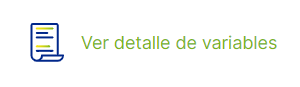

In [5]:
filtro_aportes = 'Colombia'
filtro_reservas = 'AGREGADO'

Los dataframes se filtarán para tener los datos necesarios para la visualización, eligiendo el código de variable y de una vez organizando por fecha.

In [6]:
df_filtrado_aportes = df_aportes.loc[df_aportes['RegionHidrologica'] == filtro_aportes, ['Fecha', 'AportesHidricosEnergia']]
df_filtrado_aportes['AportesHidricosEnergia']=df_filtrado_aportes['AportesHidricosEnergia']/1000000

df_filtrado_reservas = df_reservas.loc[df_reservas['CodigoEmbalse'] == filtro_reservas, ['Fecha', 'VolumenUtilDiarioEnergia']]
df_filtrado_reservas['VolumenUtilDiarioEnergia']=df_filtrado_reservas['VolumenUtilDiarioEnergia']/1000000

display(df_filtrado_reservas)

,Fecha,VolumenUtilDiarioEnergia


### Manipulación de datos
El siguiente paso es seleccionar solamente la información relevante para el análisis. Los pasos a realizar para preparar la información son:
- La columna fecha se define como fecha.
- Se eligen las columnas a graficar.

### Gráfica en el tiempo
Ahora se realiza la presentación visual de los datos del comportamiento de los aportes y reservas desde abril de 2024 a junio de 2024.

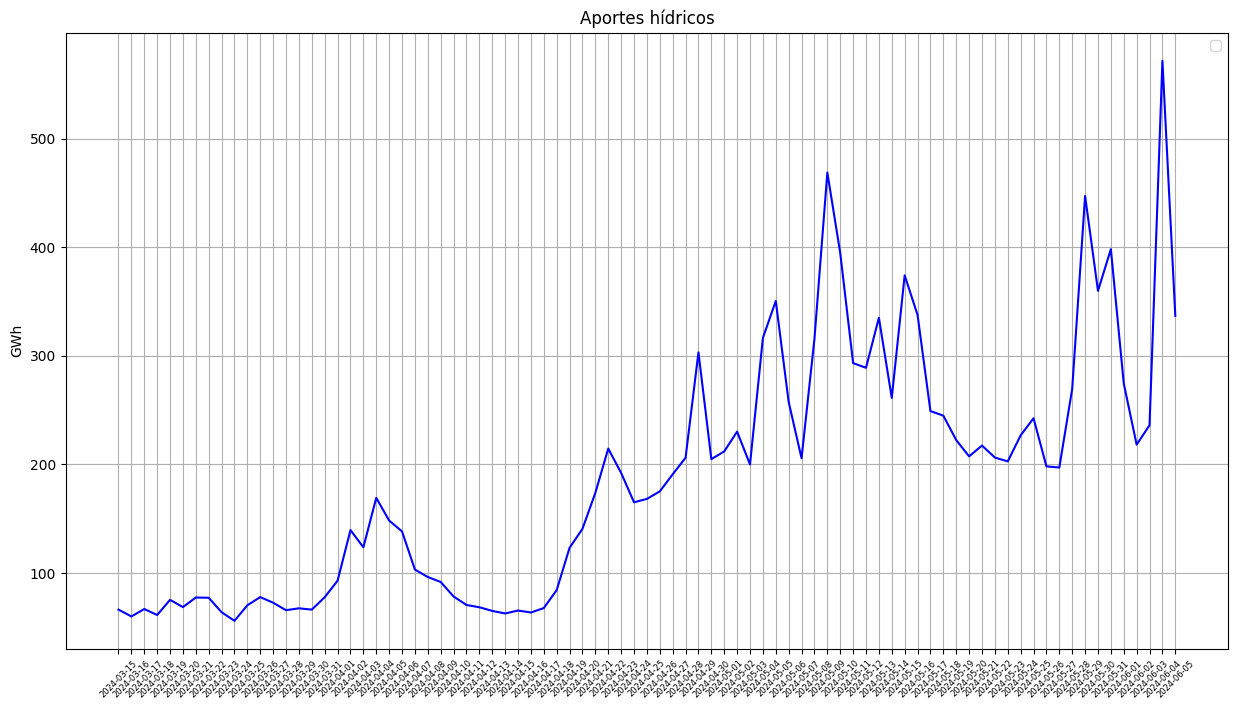

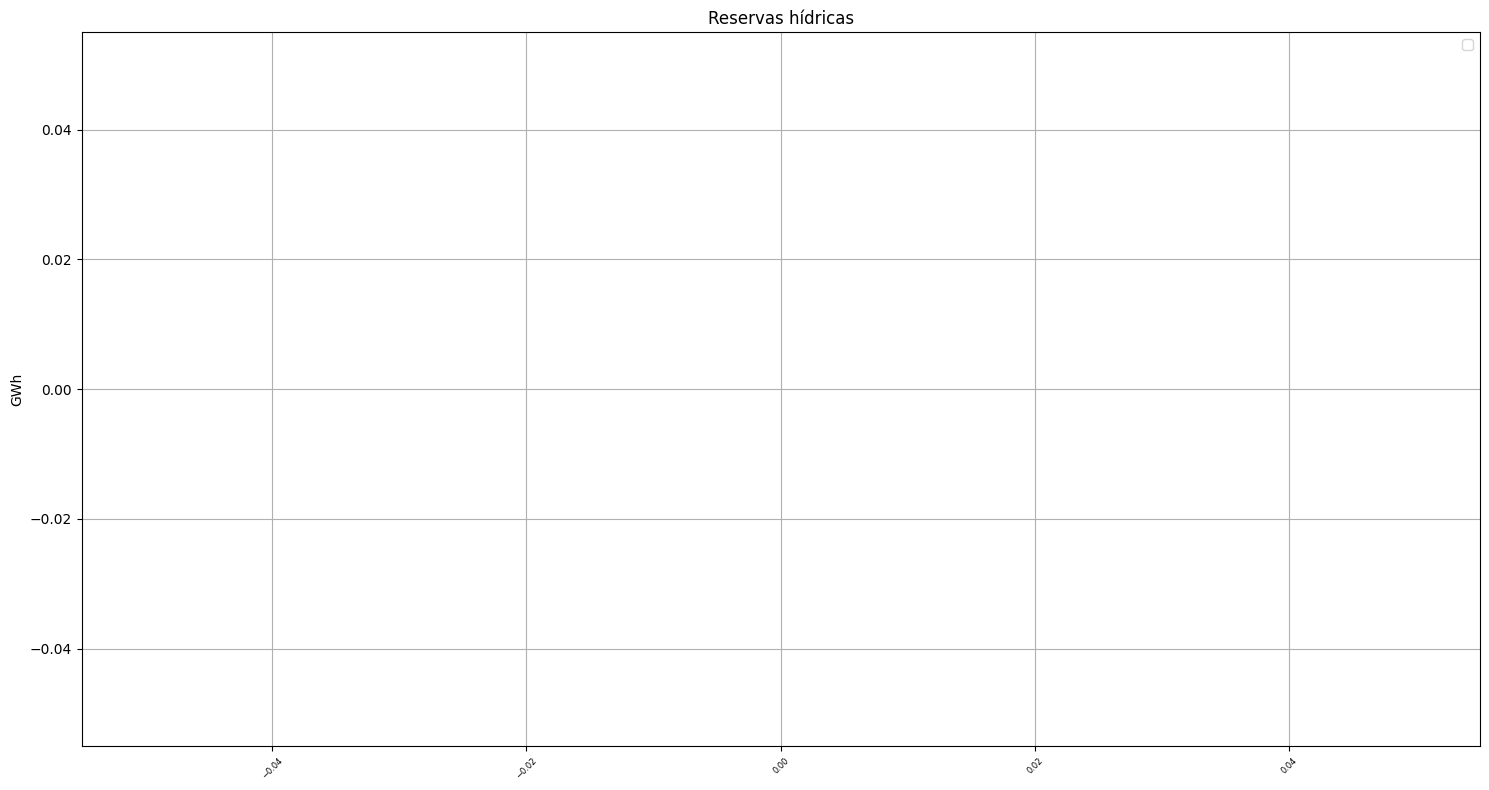

In [7]:
x_axis = 'Fecha'
y_axis_ap = 'Aportes_energia'
y_axis_re = 'Reservas energía'

def graficar() -> None:

    plt.figure(figsize=(15, 8))
    plt.plot(df_filtrado_aportes['Fecha'],df_filtrado_aportes['AportesHidricosEnergia'],  color='blue')
    plt.ylabel('GWh')
    plt.title('Aportes hídricos')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, fontsize=6)

    plt.figure(figsize=(15, 8))
    plt.plot(df_filtrado_reservas['Fecha'],df_filtrado_reservas['VolumenUtilDiarioEnergia'],  color='green')
    plt.ylabel('GWh')
    plt.title('Reservas hídricas')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, fontsize=6)

    plt.tight_layout()
    plt.show()
    return None
graficar()